<center><h1>Analyse du GnomeSort</h1></center>

Dans ce document nous allons analyser les résultats de l'algorithme Gnome sort afin de déterminer les conditions dans lesquelles l'algorithme est le plus performant.

## Analyse théorique 

Avant d'analyser le résultat de nos expérimentations sur cet algorithme, nous allons étudier la complexité de l'algorithme Gnome sort.

Le gnome sort est similaire au tri par insertion, mais plutôt que d'insérer chaque élément dans la position correcte, il "pousse" chaque élément dans sa position correcte en échangeant sa position avec celle de l'élément précédent jusqu'à ce qu'il atteigne sa position correcte.

Voici comment fonctionne l'algorithme gnome sort :

    Initialise la variable d'index i à 1.
    Tant que i est inférieur à la taille du tableau :
    - Si l'élément à l'index i est supérieur ou égal à l'élément précédent, incrémenter i.
    - Sinon, échanger l'élément à l'index i avec l'élément précédent et décrémenter i.
    - Si i devient inférieur à 1, réinitialiser i à 1.
    Le tableau trié est maintenant obtenu.

L'idée de base du gnome sort est que chaque fois qu'un élément est échangé avec son prédécesseur, il est effectivement "poussé" d'une position vers sa position correcte, tout comme un gnome qui se fraye un chemin à travers une foule en poussant les gens. Cette caractéristique de "poussée" distingue le gnome sort du tri par insertion, qui "insère" chaque élément dans sa position correcte en le déplaçant vers la droite.

Le gnome sort n'est pas très efficace pour des tableaux de grande taille, car il a une complexité quadratique dans le pire des cas (O(n^2)). C'est parce que dans le pire des cas, chaque élément doit être échangé avec l'élément précédent à chaque itération, ce qui nécessite O(n) opérations pour chaque élément. Malgré cela, le gnome sort est un algorithme intéressant et facile à implémenter, et il peut être utile pour trier de petits tableaux ou pour des situations où la mémoire est limitée.

En pratique, le gnome sort est rarement utilisé car il est plus lent que d'autres algorithmes de tri plus performants. Cependant, il a l'avantage d'être très simple à implémenter et de prendre peu de place en mémoire, ce qui peut le rendre utile dans des cas très spécifiques.



Algorithme GnomeSort :
    
    fonction gnomeSort(tableau T, taille N) :
        index = 1
        Tant que index < N Faire
            Si index == 0 ou T[index] >= T[index - 1] Alors
                index = index + 1
            Sinon
                échanger(T[index], T[index - 1])
                index = index - 1


Analyse asymptotique :

Dans le pire des cas, où le tableau est trié dans l'ordre inverse, le gnome sort effectuera O(N^2) comparaisons et O(N^2) échanges. Cela se produit car l'algorithme doit faire plusieurs passages sur le tableau en reculant d'une position à chaque échange, ce qui prend du temps.

Dans le meilleur des cas, où le tableau est déjà trié, le gnome sort effectuera O(N) comparaisons et aucune échange. Cela se produit car dans ce cas, la condition T[index] >= T[index - 1] est toujours vraie, et donc l'algorithme avance simplement dans le tableau.

Dans le cas moyen, le gnome sort effectuera un nombre de comparaisons et d'échanges intermédiaire. Il n'existe pas de formule exacte pour cela, mais on peut estimer que la complexité moyenne est également de O(N^2).

## Analyse des résultats

Dans cette partie nous allons analyser l'efficacité constatée de l'algorithme gnomeSort.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import odr
import time

### Tri de int

On importe dans la cellule suivante les données et on nomme les colonnes.

In [2]:
data = pd.read_csv('result_data/GnomeSort.csv',sep=',')# On récupère les données correspondantes
print("Fichier lu")

data.columns = ["NumberElements","NombreEchangeRd",
                     "NombreComparaisonRd","TempsMSRd","NombreEchange1_2",
                     "NombreComparaison1_2","TempsMS1_2","NombreEchangeStart25",
                     "NombreComparaisonStart25","TempsMSStart25",
                     "NombreEchangeStart50","NombreComparaisonStart50",
                     "TempsMSStart50","NombreEchangeEnd25",
                     "NombreComparaisonEnd25","TempsMSEnd25",
                     "NombreEchangeEnd50","NombreComparaisonEnd50",
                     "TempsMSEnd50","NombreEchangeSorted",
                     "NombreComparaisonSorted","TempsMSSorted"]

Fichier lu


#### En particulier

On va comparer les temps d'exécution, le nombre de comparaisons, d'échanges, pour un grand nombre n afin de voir s'il y a un cas de désordre désavantageux.

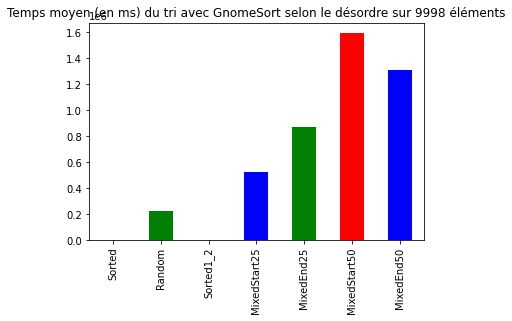

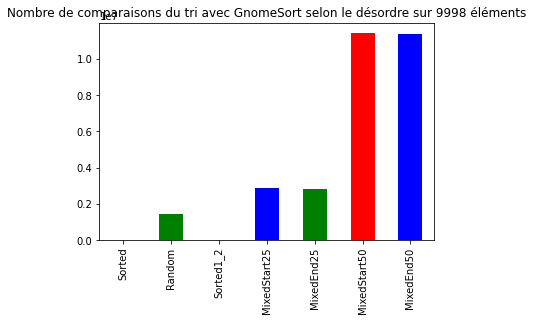

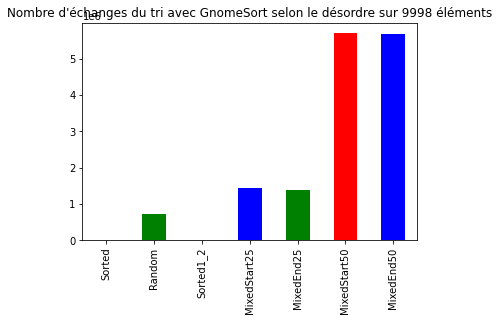

In [3]:
NomAlgorithme = "GnomeSort"
n = 9998
vitesseDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'TempsMSSorted'],
    'Random' : data.loc[:,'TempsMSRd'],
    'Sorted1_2': data.loc[:,'TempsMS1_2'],
    'MixedStart25': data.loc[:,'TempsMSStart25'],
    'MixedEnd25': data.loc[:,'TempsMSEnd25'],
    'MixedStart50': data.loc[:,'TempsMSStart50'],
    'MixedEnd50': data.loc[:,'TempsMSEnd50']
})

echangesDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreEchangeSorted'],
    'Random' : data.loc[:,'NombreEchangeRd'],
    'Sorted1_2': data.loc[:,'NombreEchange1_2'],
    'MixedStart25': data.loc[:,'NombreEchangeStart25'],
    'MixedEnd25': data.loc[:,'NombreEchangeEnd25'],
    'MixedStart50': data.loc[:,'NombreEchangeStart50'],
    'MixedEnd50': data.loc[:,'NombreEchangeEnd50']
})

comparaisonsDF = pd.DataFrame({
    'Elements':data.loc[:,'NumberElements'],
    'Sorted' : data.loc[:,'NombreComparaisonSorted'],
    'Random' : data.loc[:,'NombreComparaisonRd'],
    'Sorted1_2': data.loc[:,'NombreComparaison1_2'],
    'MixedStart25': data.loc[:,'NombreComparaisonStart25'],
    'MixedEnd25': data.loc[:,'NombreComparaisonEnd25'],
    'MixedStart50': data.loc[:,'NombreComparaisonStart50'],
    'MixedEnd50': data.loc[:,'NombreComparaisonEnd50']
})

finalCmpDF = pd.DataFrame({
    'Comparaisons': comparaisonsDF.loc[n,vitesseDF.columns != 'Elements']
})
finalTimeDF = pd.DataFrame({
    'Temps': vitesseDF.loc[n,vitesseDF.columns != 'Elements']
})
finalExDF = pd.DataFrame({
    'Echanges': echangesDF.loc[n,echangesDF.columns != 'Elements']
})

plt.figure()

finalTimeDF['Temps'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Temps moyen (en ms) du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalCmpDF['Comparaisons'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre de comparaisons du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

finalExDF['Echanges'].plot(kind = "bar", color = ['b','g','r'])
plt.title("Nombre d'échanges du tri avec " + NomAlgorithme + " selon le désordre sur " + str(n) + " éléments")
plt.show()

Ici, on observe qu'en moyenne l'algorithme GnomeSort n'est pas plus efficace si le désordre et au début ou à la fin dans la mesure où le nombre d'échanges et de comparaisons pour End25 et Start25 sont similaires.
De plus l'algorithme est très efficace lorsque le tableau est mélangé une fois sur deux, puisqu'il n'a qu'à faire un échange par élément désordonné. Contrairement à la situation où tout le tableau est désordonné.

#### Comportement par rapport aux quantités de données

Dans cette partie, nous allons observer comment le temps d'exécution évolue si l'on augmente la taille de l'échantillon à trier toujours selon le désordre.

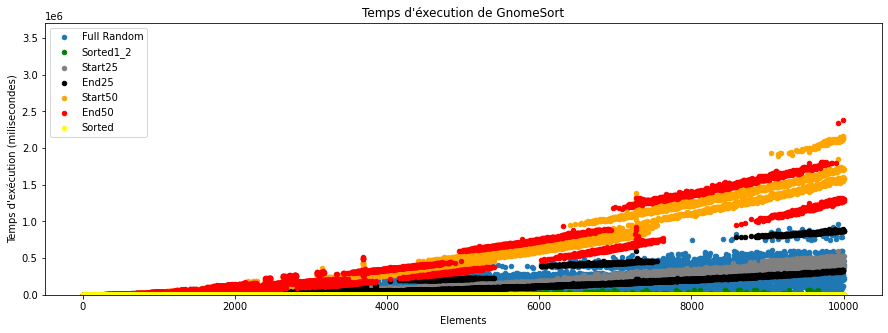

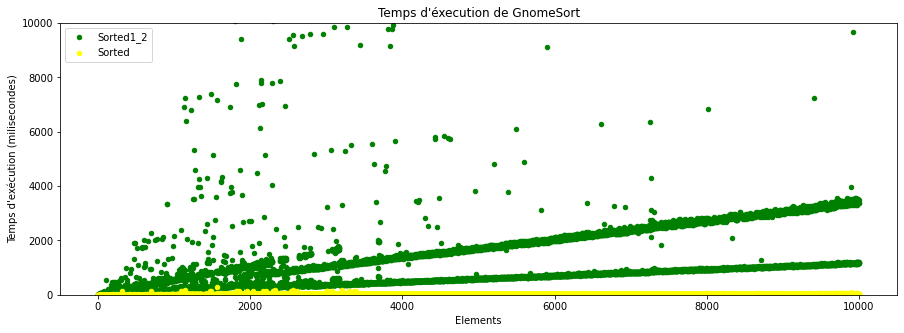

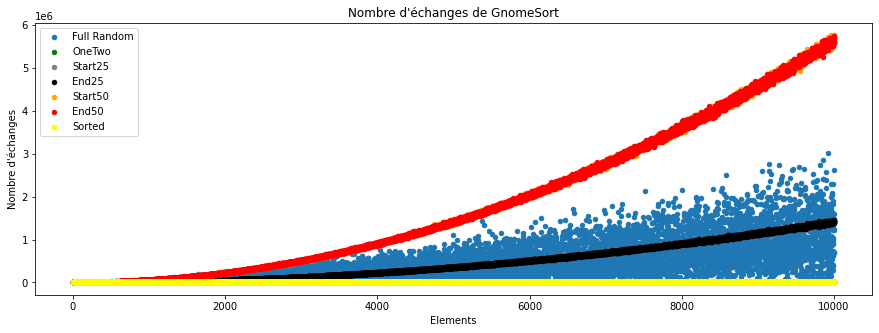

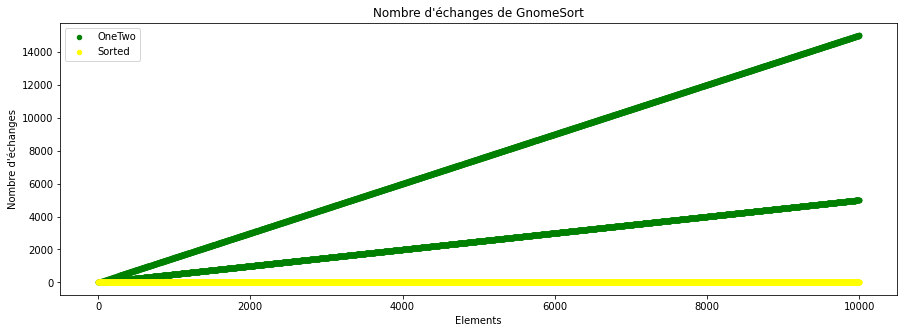

In [4]:
# solution trouvée sur https://stackoverflow.com/questions/13872533/how-to-plot-different-groups-of-data-from-a-dataframe-into-a-single-figure

fig = vitesseDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
ax = plt.gca()
ax.set_ylim([0, 3705291])
plt.show()


fig = vitesseDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "Sorted1_2",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
vitesseDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Temps d'éxecution de "+ NomAlgorithme)
fig.set_ylabel("Temps d'exécution (milisecondes)")
plt.legend(loc = 0)
ax = plt.gca()
ax.set_ylim([0, 10000])
plt.show()

fig = echangesDF.plot.scatter(x = 'Elements', y = "Random",label = "Full Random",figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart25',c = 'grey',label = "Start25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd25',c = 'black',label = "End25", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedStart50',c = 'orange',label = "Start50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = 'MixedEnd50',c = 'r',label = "End50", ax = fig)
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

fig = echangesDF.plot.scatter(x = "Elements", y = "Sorted1_2",c = 'g', label = "OneTwo", figsize=(15, 5)) # Permet de les mettre sur la même figure, à voir avec les vrais données si c'est lisible
echangesDF.plot.scatter(x = "Elements", y = "Sorted",c = 'yellow', label = "Sorted", ax = fig)
plt.title("Nombre d'échanges de "+ NomAlgorithme)
fig.set_ylabel("Nombre d'échanges")
plt.legend(loc = 0)
plt.show()

On constate à l'aide de ce nuage de points que lorsque la quantité de données est très grande le GnomeSort prend un temps n² où n est la taille de l'échantillon (ici en rouge et orange pour la moitié du tableau désordonné).

Néanmoins, quand le tableau est mélangé au hasard on obtient un léger meilleur résultat, puisque tous les éléments ne sont pas forcément désordonnés. Mais le temps reste de l'ordre de n² car les échanges son coûteux et très récurrents dans cette algorithme quand la moitié du tableau est désordonné pour un tableau n on obtient un nombre n² d'échanges ce qui explique la lenteur de l'algorithme.

Cependant, on remarque que lorsque les éléments sont triés une fois sur deux (ici en vert) le temps d'exécution croît de manière quasi-linéaire malgré la complexité en O(N²) de l'algorithme au niveau des comparaisons.

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.odr.polynomial.html
# L'idée est ici de se représenter sous forme de fonction l'écart approximatif
# entre chacun de nos résultats pour une même taille de donnée

poly_model = odr.polynomial(2)

dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'TempsMSEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du temps d'exécution du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du temps d'exécution du GnomeSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* 0.002856874538667648  + n² * 7.564815474721805e-08

Fonction d'approximation du temps d'exécution du GnomeSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* -14.624381606400025  + n² * 0.007132751555497758

Fonction d'approximation du temps d'exécution du GnomeSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* -0.6864739891591478  + n² * 0.018469614820940353



Ici, on aperçoit que lorsque le tableau est déjà trié le temps est assez linéaire, tandis que, lorsque le nombre d'éléments désordonnés augmentent on tend à augmenter le facteur de n².

Nous allons voir si on constate ce changement au niveau du nombre d'échanges.


In [6]:
dataRandom = odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeRd'])
odr_obj_rd = odr.ODR(dataRandom, poly_model)
output_rd = odr_obj_rd.run()

dataSorted= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeSorted'])
odr_obj_sorted = odr.ODR(dataSorted, poly_model)
output_sorted = odr_obj_sorted.run()

dataEnd50= odr.Data(data.loc[:,'NumberElements'],data.loc[:,'NombreEchangeEnd50'])
odr_obj_end50 = odr.ODR(dataEnd50, poly_model)
output_end50 = odr_obj_end50.run()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : \n""")
print("f(n) = n*",output_sorted.beta[1]," + n² *",output_sorted.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_rd.beta[1]," + n² *",output_rd.beta[2])
print()

print(f"""Fonction d'approximation du nombre d'échanges du {NomAlgorithme}
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: \n""")
print("f(n) = n*",output_end50.beta[1]," + n² *",output_end50.beta[2])
print()


Fonction d'approximation du nombre d'échanges du GnomeSort
en ms en fonction de la taille de l'échantillon pour un tableau déjà trié : 

f(n) = n* -2.643963534628842e-166  + n² * 3.424169316957562e-170

Fonction d'approximation du nombre d'échanges du GnomeSort
en ms en fonction de la taille de l'échantillon pour un tableau mélangé aléatoirement: 

f(n) = n* -25.688903191954537  + n² * 0.018376167431665286

Fonction d'approximation du nombre d'échanges du GnomeSort
en ms en fonction de la taille de l'échantillon pour une moitié du tableau mélangé aléatoirement: 

f(n) = n* 0.036902488832685015  + n² * 0.0564633494102067



Dans ces approximations, on retrouve d'abord que le nombre d'échanges pour le tableau trié est de 0 environ.
Et on remarque qu'avec notre échantillon de données l'augmentation de l'importance du terme en n² est due à l'augmentation présente pour le nombre d'échanges.

## Bilan

Après avoir analysé l'algorithme GnomeSort dans chacune des situations que nous avons expérimentées, nous proposons d'observer un diagramme en boîte nous permettant de déterminer quel est le pire cas d'utilisation et le meilleur cas d'utilisation de l'algorithme.

                Temps
Sorted             44
Random         225185
Sorted1_2        1182
MixedStart25   525438
MixedEnd25     871740
MixedStart50  1595019
MixedEnd50    1310646


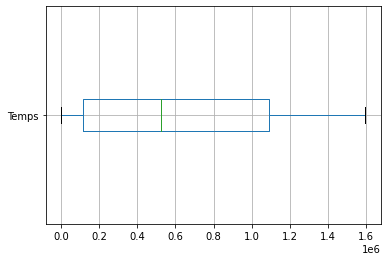

La meilleure des situations pour GnomeSort est lorsqu'il tri un tableau mélangé avec l'algorithme Sorted de mélange.
La pire des situations pour GnomeSort est lorsqu'il tri le tableau mélangé avec l'algorithme MixedStart50 de mélange.
              Echanges
Sorted               0
Random          707409
Sorted1_2         5000
MixedStart25   1425357
MixedEnd25     1395633
MixedStart50   5705291
MixedEnd50     5687196


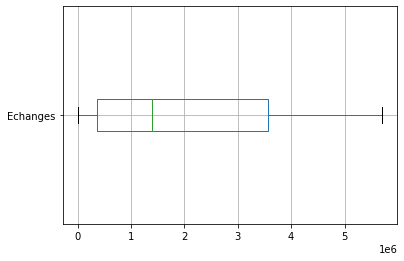

              Comparaisons
Sorted                9999
Random             1424817
Sorted1_2            19998
MixedStart25       2860708
MixedEnd25         2801265
MixedStart50      11420576
MixedEnd50        11384391


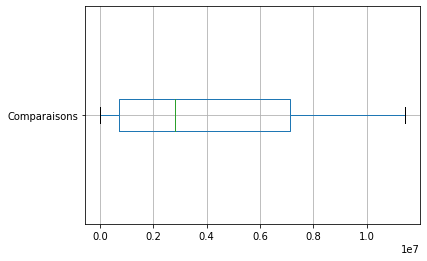

In [7]:
def findMaxRowColumnName(df):
    maximumRowsName = df.idxmax()
    return maximumRowsName

def findMinRowColumnName(df):
    minimumRowsName = df.idxmin()
    return minimumRowsName
minimum = findMinRowColumnName(finalTimeDF)
maximum = findMaxRowColumnName(finalTimeDF)

finalTimeDF.boxplot(vert = False)
print(finalTimeDF)
plt.show()

print("La meilleure des situations pour " + NomAlgorithme +
      " est lorsqu'il tri un tableau mélangé avec l'algorithme", minimum[0],"de mélange.")
print("La pire des situations pour " + NomAlgorithme + " est lorsqu'il tri le tableau mélangé avec l'algorithme", maximum[0],"de mélange.")

finalExDF.boxplot(vert = False)
print(finalExDF)
plt.show()
finalCmpDF.boxplot(vert = False)
print(finalCmpDF)

Pour conclure, nous pouvons dire que l'algorithme GnomeSort est au maximum de son efficacité lorsque le tableau a un désordre de type :  un élément sur deux triés.

Cependant, l'algorithme prend un temps de l'ordre de N² dans les autres cas, peu importe où est le désordre, le temps est le même que ce soit au début ou à la fin.

La meilleure situation pour utiliser le GnomeSort est lorsque l'échantillon de données est quasiment trié, la pire des situations est lorsque le tableau est entièrement désordonné voire même un ordre inversé.